<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/ML_ch_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise: Improving a logistic regression model**

In the previous exercise, we fit a simple logistic regression model to predict the chance of an avalanche. This time, we'll improve its performance by using multiple features intelligently.

Like **linear regression**, **logistic regression** doesn't have to be limited to a single input. It can combine features to make predictions. For example, we might try to predict avalanches based on snow fall and number of hikers disturbing a trail. We can enter both of these features into the same model to calculate a probability of an avalanche.

**Think about your features**

The other way to improve models is to give real thought to which features are supplied, and why. Generally, the more features we add to a model, the better the model works. However, this correlation is only true if the features we provide are relevant and explain something that existing features don't.

 **Avoiding overtraining**

If we supply more features that aren't useful, the model can overtrain, giving the appearance of working better but actually working worse in the real world.

For example, imagine if we had daily records of the amount_of_snow, number_of_hikers, temperature, and number_of_birds_spotted. The number of birds spotted is probably not relevant information; yet if supplied, the model ends up modeling a relationship between avalanches and the number of birds spotted on given days. If birds were spotted more on avalanche days, the model suggests birds could be responsible for causing avalanches. We might then set up a systematic bird watching program to predict avalanches, only to find it doesn't work at all.

**Avoiding undertraining**

Using features naively can also lead to undertraining and not making predictions as correctly as possible. For example, the temperature and the number_of_hikers might both be closely linked to avalanche; yet if people only walk on sunny days, the model might find it difficult to differentiate how important hikers are in comparison to temperature.

# **Data visualisation**

Let's load our data.

In [1]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/avalanche.csv

#Import the data from the .csv file
dataset = pandas.read_csv('avalanche.csv', delimiter="\t", index_col=0)

# Split our data into training and test
import sklearn.model_selection
train, test = sklearn.model_selection.train_test_split(dataset, test_size=0.25, random_state=10)

print("Train size:", train.shape[0])
print("Test size:", test.shape[0])

#Let's have a look at the data
print(train.head())

--2025-06-03 17:11:05--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0s      

2025-06-03 17:11:05 (89.1 MB/s) - ‘graphing.py’ saved [21511/21511]

--2025-06-03 17:11:05--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/avalanche.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiti

We have numerous features available:



*   surface_hoar is how disturbed the surface of the snow is.
*   fresh_thickness is how thick the top layer of snow is, or 0 if there's no fresh snow on top.
*   wind is the top wind speed that day, in km/h.
*   weak_layers is the number of layers of snow that aren't well-bound to other layers.
*   no_visitors is the number of hikers who were on the trail that day.
*   tracked_out is a 1 or 0. A 1 means that the snow has been trampled heavily by hikers.













**Simple logistic regression**

Let's make a simple logistic regression model and assess its performance with accuracy.

In [2]:
import sklearn
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf

# Perform logistic regression.
model = smf.logit("avalanche ~ weak_layers", train).fit()

# Calculate accuracy
def calculate_accuracy(model):
    '''
    Calculates accuracy
    '''
    # Make estimations and convert to categories
    avalanche_predicted = model.predict(test) > 0.5

    # Calculate what proportion were predicted correctly
    # We can use sklearn to calculate accuracy for us
    print("Accuracy:", accuracy_score(test.avalanche, avalanche_predicted))

calculate_accuracy(model)

Optimization terminated successfully.
         Current function value: 0.616312
         Iterations 5
Accuracy: 0.6167883211678832


Let's see how we can improve our model.

# **Utilizing multiple features**

Most of our features seem like they could be useful, least in theory. Let's try a model with all available features.

In [3]:
# Perform logistic regression.
model_all_features = smf.logit("avalanche ~ weak_layers + surface_hoar + fresh_thickness + wind + no_visitors + tracked_out", train).fit()
calculate_accuracy(model_all_features)

Optimization terminated successfully.
         Current function value: 0.459347
         Iterations 7
Accuracy: 0.7846715328467153


That's a big improvement on the simpler model with which we've been working.

To understand why, we can look at the summary information.

In [4]:
model_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              avalanche   No. Observations:                  821
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.3305
Time:                        17:14:16   Log-Likelihood:                -377.12
converged:                       True   LL-Null:                       -563.33
Covariance Type:            nonrobust   LLR p-value:                 2.372e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0107      0.443     -9.043      0.000      -4.880      -3.141
weak_layers         0.3733      0.034     10.871      0.000       0.306       0.441
surface_hoar        0.3306      0.035      9.424      0.000       0.262       0.399
fresh_thickness    -0.0220      0.030     -0.732      0.464      -0.081       0.037
wind                0.1009      0.009     11.149      0.000       0.083       0.119
no_visitors        -0.1060      0.032     -3.262      0.001      -0.170      -0.042
tracked_out        -0.0664      0.181     -0.367      0.713      -0.420       0.288
===================================================================================
"""

Take a look at the P column, recalling that values less than 0.05 mean we can be confident that this parameter is helping the model make better predictions.

Both surface_hoar and wind have very small values here, meaning they're useful predictors and probably explain why our model is working better. If we look at the coef (which states parameters) column we see that these have positive values. This means that higher winds and greater amounts of surface hoar result in higher avalanche risk.

# **Simplifying our model**

Looking at the summary again, we can see that tracked_out (how trampled the snow is), and fresh_thickness have large p-values. This means they aren't useful predictors. Let's see what happens if we remove them from our model:

In [5]:
# Perform logistic regression.
model_simplified = smf.logit("avalanche ~ weak_layers + surface_hoar + wind + no_visitors", train).fit()
calculate_accuracy(model_simplified)

Optimization terminated successfully.
         Current function value: 0.459760
         Iterations 7
Accuracy: 0.781021897810219


Our new model works very similarly to the old one! In some circumstances, simplifying a model like this can even improve it because it becomes less likely to overfit.

# **Careful feature selection**

Usually, we don't just pick features blindly. Let's think about what we've just done: we removed how much fresh snow was in a model, trying to predict avalanches. Something seems off. Surely avalanches are much more likely after it has snowed? Similarly, the number of people on the track seems unrelated to how many avalanches there were, but we know that people often can trigger avalanches.

Let's review our earlier model again:

In [6]:
model_all_features.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              avalanche   No. Observations:                  821
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.3305
Time:                        17:16:41   Log-Likelihood:                -377.12
converged:                       True   LL-Null:                       -563.33
Covariance Type:            nonrobust   LLR p-value:                 2.372e-77
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -4.0107      0.443     -9.043      0.000      -4.880      -3.141
weak_layers         0.3733      0.034     10.871      0.000       0.306       0.441
surface_hoar        0.3306      0.035      9.424      0.000       0.262       0.399
fresh_thickness    -0.0220      0.030     -0.732      0.464      -0.081       0.037
wind                0.1009      0.009     11.149      0.000       0.083       0.119
no_visitors        -0.1060      0.032     -3.262      0.001      -0.170      -0.042
tracked_out        -0.0664      0.181     -0.367      0.713      -0.420       0.288
===================================================================================
"""

Look at the fresh_thickness row. We're told that it has a negative coefficient. This means that as thickness increases, avalanches decrease.

Similarly, no_visitors has a negative coefficient, meaning that fewer hikers means more avalanches.

How can this be? Well, while visitors can cause avalanches if there's a lot of fresh snow, presumably they can't easily do so if there's no fresh snow. This means that our features aren't fully independent.

We can tell the model to try to take into account that these features interact by using a multiply sign. Let's try that now.

In [7]:
# Create a model with an interaction. Notice the end of the string where
# we've a multiply sign between no_visitors and fresh_thickness
formula = "avalanche ~ weak_layers + surface_hoar + wind + no_visitors * fresh_thickness"
model_with_interaction = smf.logit(formula, train).fit()
calculate_accuracy(model_with_interaction)

Optimization terminated successfully.
         Current function value: 0.413538
         Iterations 7
Accuracy: 0.8357664233576643


The model has improved to 84% accuracy! Let's look at the summary information:

In [8]:
model_with_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              avalanche   No. Observations:                  821
Model:                          Logit   Df Residuals:                      814
Method:                           MLE   Df Model:                            6
Date:                Tue, 03 Jun 2025   Pseudo R-squ.:                  0.3973
Time:                        17:17:41   Log-Likelihood:                -339.51
converged:                       True   LL-Null:                       -563.33
Covariance Type:            nonrobust   LLR p-value:                 1.587e-93
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -0.9606      0.587     -1.636      0.102      -2.111       0.190
weak_layers                     0.4327      0.039     11.193      0.000       0.357       0.508
surface_hoar                    0.3887      0.039     10.035      0.000       0.313       0.465
wind                            0.1204      0.010     11.607      0.000       0.100       0.141
no_visitors                    -0.9430      0.114     -8.237      0.000      -1.167      -0.719
fresh_thickness                -0.4962      0.069     -7.191      0.000      -0.631      -0.361
no_visitors:fresh_thickness     0.1015      0.013      7.835      0.000       0.076       0.127
===============================================================================================
"""

We can see that the interaction term is helpful; the p-value is less than 0.05. The model is also performing better than our previous attempts.

# **Making predictions with multiple features**

Very quickly, let's explore what this interaction means by looking at model predictions.

We'll first graph two independent features in 3D. Let's start with weak_layers and wind:

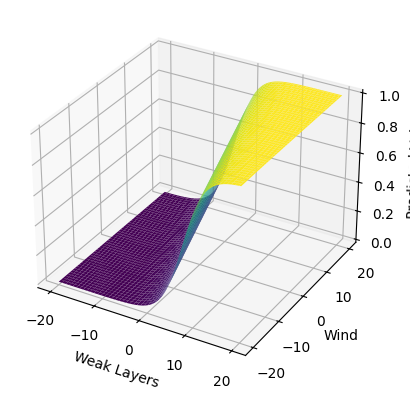

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

def predict(weak_layers, wind, surface_hoar=0, fresh_thickness=0, no_visitors=0):
    return model_with_interaction.predict(pd.DataFrame({
        "weak_layers": weak_layers,
        "wind": wind,
        "surface_hoar": surface_hoar,
        "fresh_thickness": fresh_thickness,
        "no_visitors": no_visitors
    }))

# Generate a graph for weak_layers and wind
weak_layers = np.linspace(-20, 20, 100)
wind = np.linspace(-20, 20, 100)
weak_layers_grid, wind_grid = np.meshgrid(weak_layers, wind)

predicted_values = predict(weak_layers_grid.ravel(), wind_grid.ravel()).to_numpy().reshape(weak_layers_grid.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(weak_layers_grid, wind_grid, predicted_values, cmap='viridis')

ax.set_xlabel("Weak Layers")
ax.set_ylabel("Wind")
ax.set_zlabel("Predicted Values")

plt.show()

There's now a clear s-shaped relationship between the features and probability.

Let's now look at the features that we've said can interact:

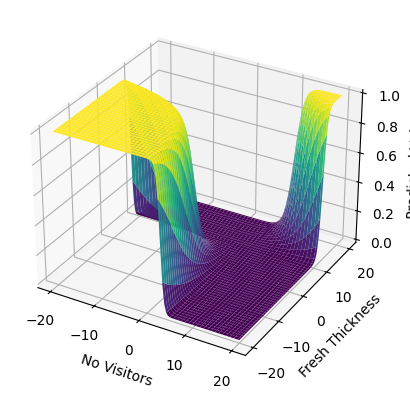

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

def predict(no_visitors, fresh_thickness, weak_layers=0, wind=0, surface_hoar=0):
    return model_with_interaction.predict(pd.DataFrame({
        "no_visitors": no_visitors,
        "fresh_thickness": fresh_thickness,
        "weak_layers": weak_layers,
        "wind": wind,
        "surface_hoar": surface_hoar
    }))

# Generate the graph
no_visitors = np.linspace(-20, 20, 100)
fresh_thickness = np.linspace(-20, 20, 100)
no_visitors_grid, fresh_thickness_grid = np.meshgrid(no_visitors, fresh_thickness)

predicted_values = predict(no_visitors_grid.ravel(), fresh_thickness_grid.ravel()).to_numpy().reshape(no_visitors_grid.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(no_visitors_grid, fresh_thickness_grid, predicted_values, cmap='viridis')

ax.set_xlabel("No Visitors")
ax.set_ylabel("Fresh Thickness")
ax.set_zlabel("Predicted Values")

plt.show()

This graph looks quite different to the other! From any side, we can see an s-shape, but these combine in strange ways.

We can see that the risk goes up on days with lots of visitors and lots of snow. There's no real risk of avalanche when there's a lot of snow but no visitors, or when there are a lot of visitors but no snow.

The fact that it shows high risk when there's no fresh snow and no visitors could be due to rain, which keeps visitors and snow clouds away, but results in avalanches of the older snow. To confirm this, we'd need to explore the data in more depth, but we'll stop here for now.

# **Summary**

Well done! Let's recap. We've:



*   Improved our simple model by adding more features.
*   Practiced interpreting our model coefficients (parameters) from the model summary.
*   Created a model that combined features to give a superior result.
*   Eliminated unnecessary features.
*   Explored how sometimes it's important to think about what your data really means.









# Brainstorming

What's the difference between classical regression and classification models?

How can we improve real-world model performance?

What is one reason why logistic regression uses log-loss rather than a more intuitive cost function?